In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
my_seed = 1337
random.seed(my_seed)
np.random.seed(my_seed)
import pandas as pd
import numpy as np
import seaborn as sns
from typing import *
from IPython.display import display, HTML, Markdown

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题


### 简单数据查看

In [3]:
def load_movies_dataset():
    #movie_data_columns = [
    #'type_douban', 'actor', 'region', 'director', 'characteristic',
    #'score_douban', 'moviename']
    movie_data = pd.read_csv(data_dir + './dataset1/movie.csv')
    #movie_data.columns = movie_data_columns 
    return movie_data 

def load_user_and_ratings() :
    user_data = pd.read_csv(data_dir + './dataset1/user.csv')
    user_data['comment_time'] = pd.to_datetime(user_data['评论时间'])
    return user_data 

def load_doubanmovieshortcomments() :
    movieshortcomments_data = pd.read_csv(data_dir_doubanmovieshortcomments + './DMSC.csv')

    return movieshortcomments_data 

data_dir = 'D:/python/Jupyter_Last_project/dataset/'
data_dir_doubanmovieshortcomments = 'D:/python/Jupyter_Last_project/dataset/doubanmovieshortcomments/'
movies_data = load_movies_dataset()
print('movies_data.head()\n',movies_data.head())
user_data = load_user_and_ratings() 
print('user_data.head()\n',user_data.head())
movieshortcomments_data = load_doubanmovieshortcomments()
print('movieshortcomments_data.head()\n',movieshortcomments_data.head())

movies_data.head()
    类型                  主演    地区     导演  特色   评分     电影名
0  剧情    徐峥|王传君|周一围|谭卓|章宇  中国大陆    文牧野  经典  8.9   我不是药神
1  剧情   冯小刚|许晴|张涵予|刘桦|李易峰  中国大陆     管虎  经典  7.8     老炮儿
2  剧情  王宝强|刘昊然|肖央|刘承羽|尚语贤  中国大陆    陈思诚  经典  6.7  唐人街探案2
3  剧情  任素汐|大力|刘帅良|裴魁山|阿如那  中国大陆  周申|刘露  经典  8.3     驴得水
4  剧情   徐峥|王宝强|李曼|李小璐|左小青  中国大陆    叶伟民  经典  7.5    人在囧途
user_data.head()
    评分     用户名                 评论时间  用户ID    电影名  类型        comment_time
0   2      身似  2018-01-05 15:05:06     1   心雨花露  爱情 2018-01-05 15:05:06
1   4  有意识的贱民  2018-01-05 15:05:06     3  战争的恐怖  战争 2018-01-05 15:05:06
2   2    亿万露电  2018-01-05 15:05:06     4  豪勇七蛟龙  战争 2018-01-05 15:05:06
3   2   Marni  2018-01-05 15:05:06     5   无序之主  犯罪 2018-01-05 15:05:06
4   4   马西嘻嘻嘻  2018-01-05 15:05:06     6  时装店风波  同性 2018-01-05 15:05:06
movieshortcomments_data.head()
    ID           Movie_Name_EN Movie_Name_CN  Crawl_Date  Number Username  \
0   0  Avengers Age of Ultron        复仇者联盟2  2017-01-22       1       然潘   
1   1  Ave

### 电影数据查看

In [4]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89524 entries, 0 to 89523
Data columns (total 7 columns):
类型     89524 non-null object
主演     89524 non-null object
地区     89524 non-null object
导演     89524 non-null object
特色     89524 non-null object
评分     89524 non-null float64
电影名    89524 non-null object
dtypes: float64(1), object(6)
memory usage: 4.8+ MB


In [3]:
movies_data.shape

(89524, 7)

In [4]:
len(movies_data['电影名'].unique())

22971

In [5]:
movies_data.describe()

,评分
count,89524.000000
mean,6.862008
std,1.268034
min,2.100000
25%,6.200000
50%,7.000000
75%,7.700000
max,9.800000


In [6]:
#豆瓣对电影的评分是连续的

In [7]:
movies_data['评分'].value_counts()

7.3    3512
7.5    3399
7.6    3247
7.4    3177
7.7    3154
       ... 
2.3      51
2.2      36
9.7      15
2.1      14
9.8       3
Name: 评分, Length: 78, dtype: int64

<AxesSubplot:xlabel='评分', ylabel='Density'>

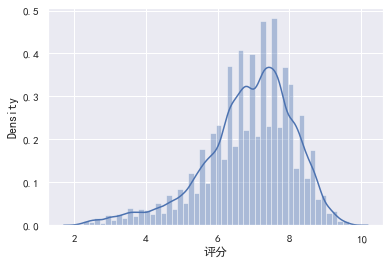

In [8]:
sns.distplot(movies_data['评分'])

<AxesSubplot:xlabel='地区', ylabel='Count'>

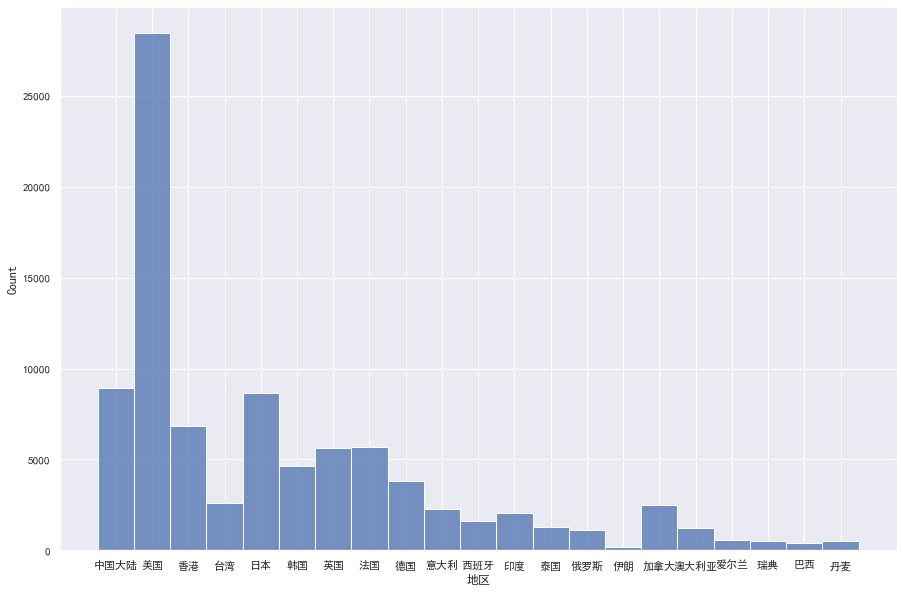

In [9]:
plt.figure(figsize=(15, 10))
sns.histplot(movies_data['地区'])

<AxesSubplot:xlabel='特色', ylabel='Count'>

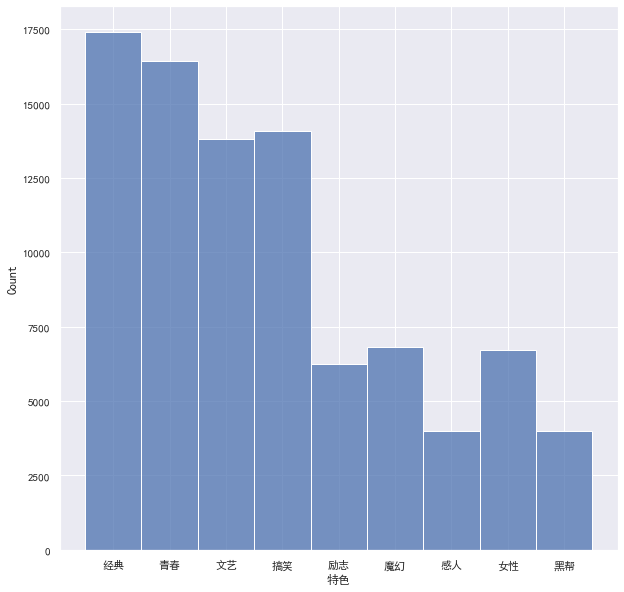

In [10]:
plt.figure(figsize=(10, 10))
sns.histplot(movies_data['特色'])

In [11]:
movies_data['导演'].value_counts()

王晶                         193
史蒂文·斯皮尔伯格                  177
徐克                         162
刘镇伟                        160
杜琪峰                        153
                          ... 
Gregory J|Lanesey            1
路易斯·加西亚·贝尔兰加                 1
Tony Bill|Barry L|Young      1
吴德淳                          1
Teresa Villaverde            1
Name: 导演, Length: 13831, dtype: int64

### 用户数据查看

In [12]:
user_data.shape

(188843, 7)

In [13]:
#21753个不同的电影
print(len(user_data['电影名'].unique()))

21753


In [14]:
#13532个不同的用户
print(len(user_data['用户名'].unique()))

13532


In [15]:
user_data.head(2)

,评分,用户名,评论时间,用户ID,电影名,类型,comment_time
0,2,身似,2018-01-05 15:05:06,1,心雨花露,爱情,2018-01-05 15:05:06
1,4,有意识的贱民,2018-01-05 15:05:06,3,战争的恐怖,战争,2018-01-05 15:05:06


### 用户的评分跟豆瓣评分的关系 ——待定

In [59]:
user_data.describe()

,评分,用户ID
count,188843.000000,188843.000000
mean,7.021473,12265.094973
std,2.638943,11468.370061
min,2.000000,1.000000
25%,4.000000,3914.000000
50%,8.000000,9286.000000
75%,10.000000,16815.000000
max,10.000000,89178.000000


In [16]:
user_data['评分'].value_counts()

8     75078
4     50685
10    49548
2     13520
6        12
Name: 评分, dtype: int64

<AxesSubplot:xlabel='评分', ylabel='Count'>

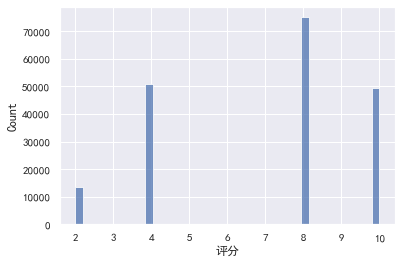

In [17]:
sns.histplot(user_data['评分'])

<AxesSubplot:xlabel='类型', ylabel='Count'>

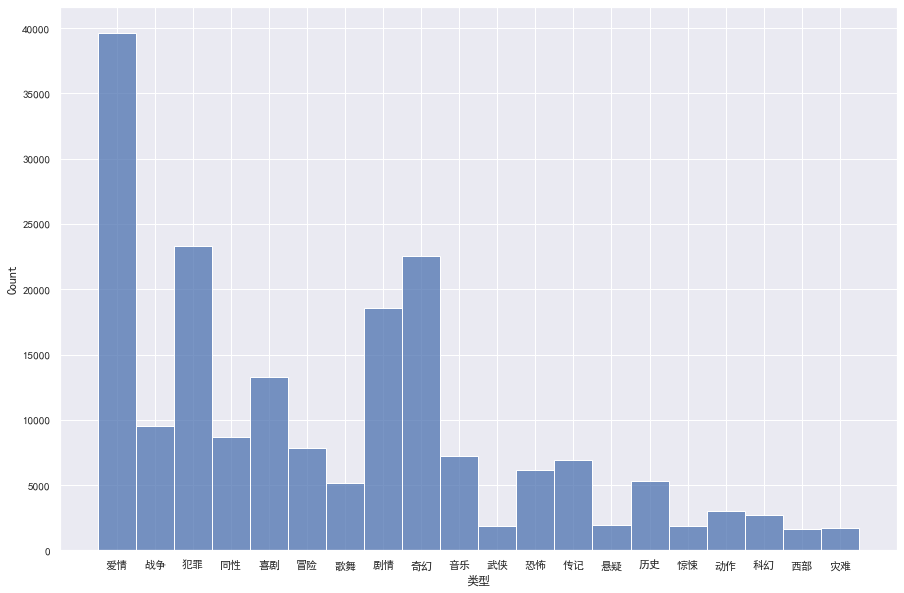

In [18]:
plt.figure(figsize=(15, 10))
sns.histplot(user_data['类型'])

In [19]:
user_data['电影名'].value_counts()

阿凡达：创建潘多拉世界    22
压轴好戏           21
青春爱欲吻          20
怀胎十月           20
乱世冤家           20
               ..
绷带              1
南方大作战           1
柠檬可乐            1
完美的陌生人          1
爱在初春惊变时         1
Name: 电影名, Length: 21753, dtype: int64

In [20]:
user_data.head(1)

,评分,用户名,评论时间,用户ID,电影名,类型,comment_time
0,2,身似,2018-01-05 15:05:06,1,心雨花露,爱情,2018-01-05 15:05:06


### 查看评论时间以及年月

In [21]:
user_data['year'] =  pd.to_datetime(user_data['评论时间'].map(lambda x:x[:10])).map(lambda x:x.year)
user_data['year'] = pd.to_datetime(user_data['year'].astype(str),format='%Y-%m-%d')
user_data.head(1)

,评分,用户名,评论时间,用户ID,电影名,类型,comment_time,year
0,2,身似,2018-01-05 15:05:06,1,心雨花露,爱情,2018-01-05 15:05:06,2018-01-01


In [22]:
user_data['year'].value_counts()

2018-01-01    188843
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

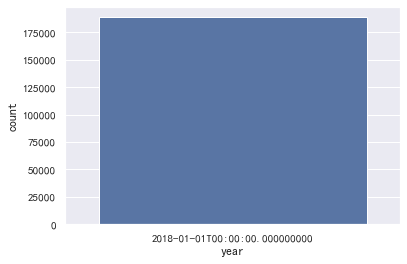

In [23]:
sns.countplot('year',data=user_data)

<AxesSubplot:xlabel='year', ylabel='Count'>

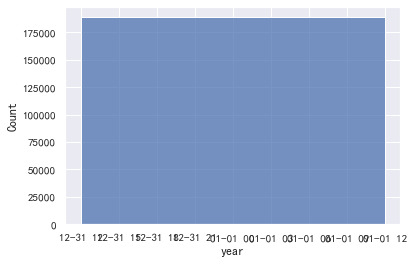

In [24]:
sns.histplot( user_data['year'])

In [25]:
user_data['year_and_month'] =  pd.to_datetime(user_data['评论时间'].map(lambda x:x[:7])).map(lambda x:  str(x.year) + '-' + '0' + str(x.month) \
                                                                                         if x.month < 10 else \
                                                                                        str(x.year) + '-'   + str(x.month))
user_data['year_and_month'] = pd.to_datetime(user_data['year_and_month'])
user_data.head(1)

,评分,用户名,评论时间,用户ID,电影名,类型,comment_time,year,year_and_month
0,2,身似,2018-01-05 15:05:06,1,心雨花露,爱情,2018-01-05 15:05:06,2018-01-01,2018-01-01


In [26]:
user_data['year_and_month'].value_counts()

2018-01-01    179427
2018-02-01      9416
Name: year_and_month, dtype: int64

<AxesSubplot:xlabel='year_and_month', ylabel='Density'>

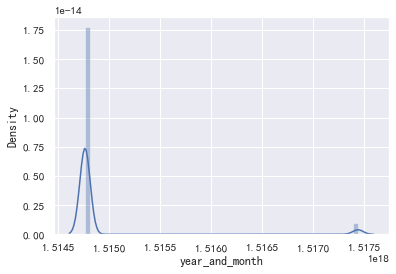

In [27]:
sns.distplot(user_data['year_and_month'])

In [28]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188843 entries, 0 to 188842
Data columns (total 9 columns):
评分                188843 non-null int64
用户名               188843 non-null object
评论时间              188843 non-null object
用户ID              188843 non-null int64
电影名               188843 non-null object
类型                188843 non-null object
comment_time      188843 non-null datetime64[ns]
year              188843 non-null datetime64[ns]
year_and_month    188843 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(4)
memory usage: 13.0+ MB


### 豆瓣打分与短评数据集分析

In [29]:
movieshortcomments_data.head(1)

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404


In [61]:
movieshortcomments_data[['Star','Like']].describe()

,Star,Like
count,2.125056e+06,2.125056e+06
mean,3.638320e+00,1.078081e+00
std,1.240807e+00,5.436271e+01
min,1.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00
75%,5.000000e+00,0.000000e+00
max,5.000000e+00,1.549900e+04


In [30]:
#738700个不同的用户
print( movieshortcomments_data['Username'].nunique() )

738700


In [31]:
#28个不同的电影
print( movieshortcomments_data['Movie_Name_CN'].nunique() )

28


In [32]:
movieshortcomments_data.shape

(2125056, 10)

In [33]:
movieshortcomments_data.isnull().sum()

ID                 0
Movie_Name_EN      0
Movie_Name_CN      0
Crawl_Date         0
Number             0
Username         149
Date               0
Star               0
Comment            0
Like               0
dtype: int64

In [34]:
print(sum(movieshortcomments_data.Movie_Name_CN.value_counts()))
movieshortcomments_data.Movie_Name_CN.value_counts()

2125056


疯狂动物城     137511
大圣归来      133393
后会无期      120200
寻龙诀       113687
你的名字      113260
夏洛特烦恼     109162
釜山行       102876
爱乐之城       96620
西游伏妖篇      91452
小时代1       88903
泰囧         85677
大鱼海棠       83692
长城         83173
西游降魔篇      79962
复仇者联盟      78281
美人鱼        73882
七月与安生      68359
美国队长3      64410
变形金刚4      58746
复仇者联盟2     54153
十二生肖       46233
九层妖塔       44366
小时代3       41152
左耳         39802
湄公河行动      35093
栀子花开       30475
何以笙箫默      26797
钢铁侠1       23739
Name: Movie_Name_CN, dtype: int64

<AxesSubplot:xlabel='Movie_Name_CN', ylabel='Count'>

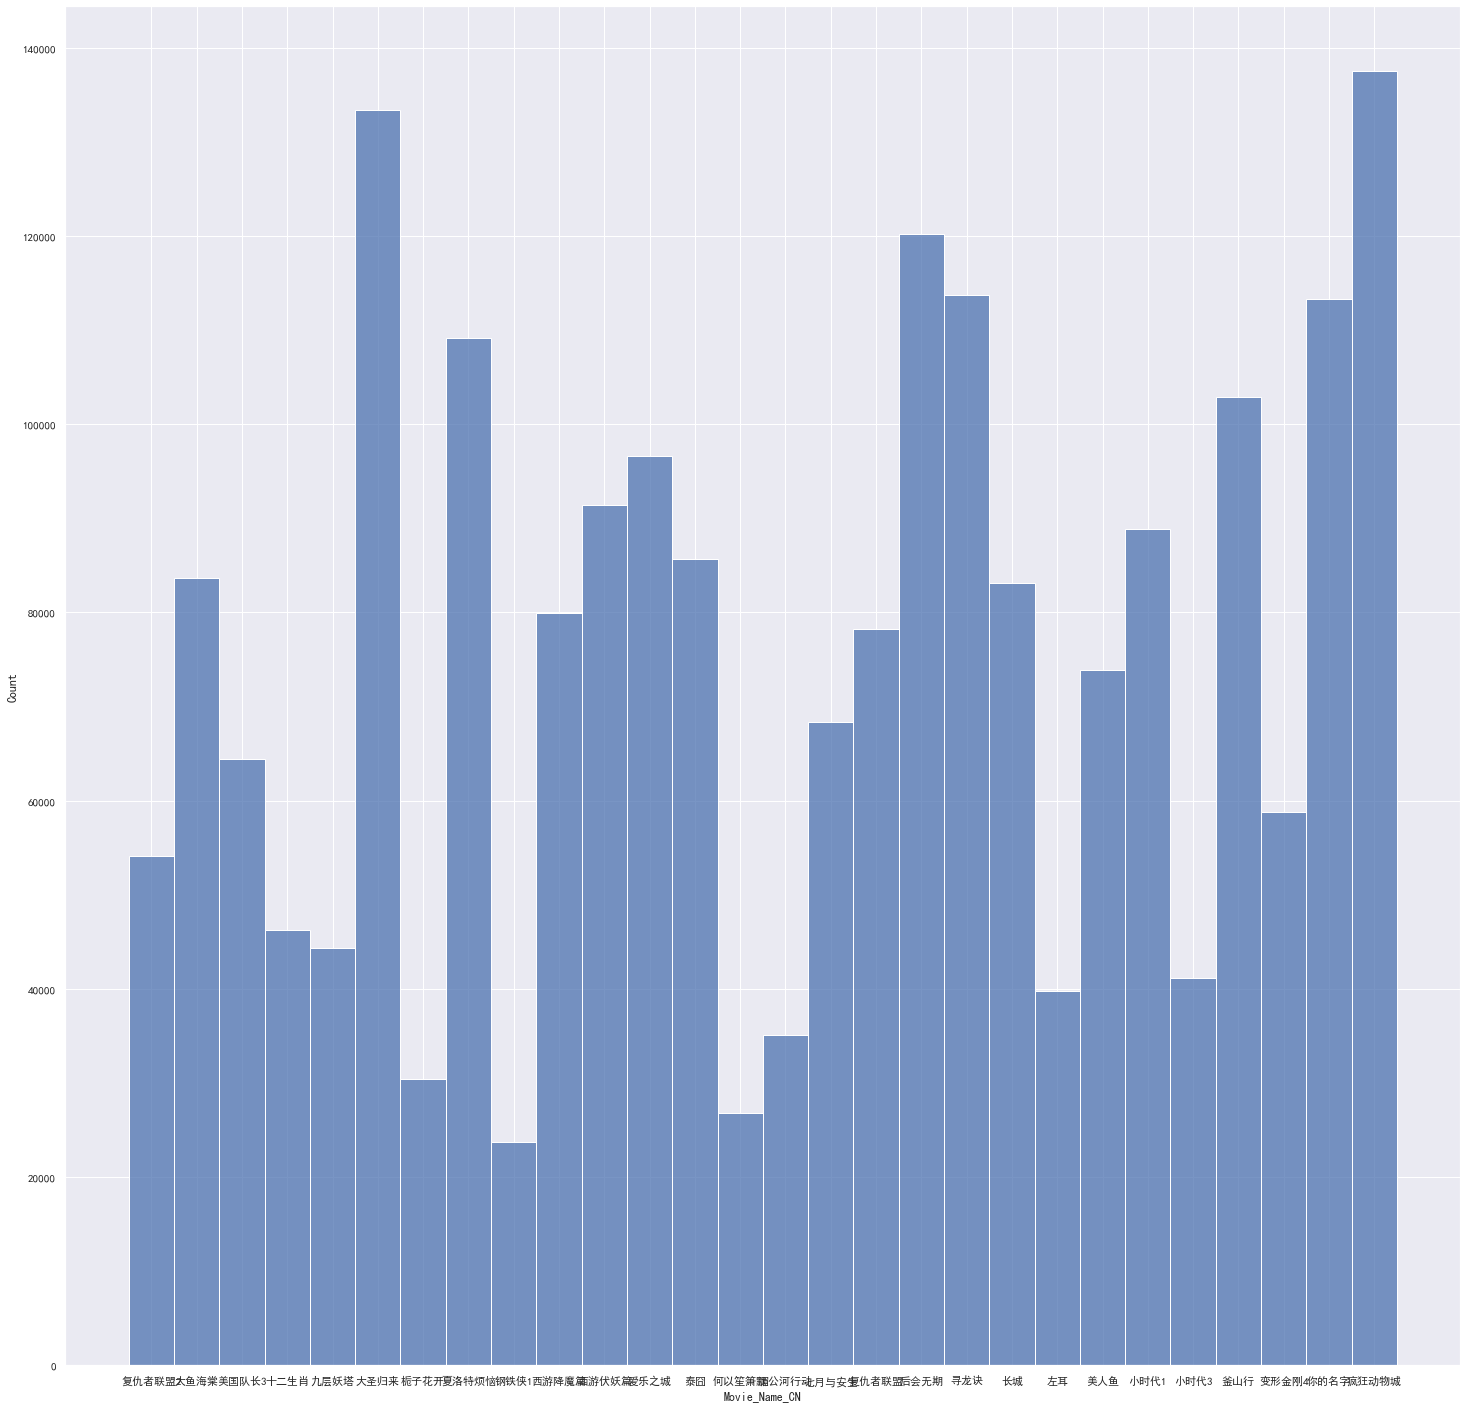

In [35]:
plt.figure(figsize=(25, 25))
sns.histplot(movieshortcomments_data['Movie_Name_CN'])

### star分析

In [36]:
movieshortcomments_data.Star.value_counts()

4    641786
5    638106
3    474559
1    190927
2    179678
Name: Star, dtype: int64

<AxesSubplot:xlabel='Star', ylabel='Count'>

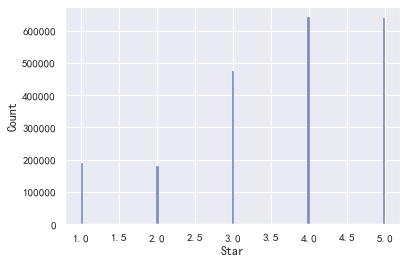

In [37]:
sns.histplot(movieshortcomments_data['Star'])

### 分析评论日期

In [38]:
movieshortcomments_data.head(1)

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404


In [39]:
movieshortcomments_data['Date'] = pd.to_datetime(movieshortcomments_data['Date'])
movieshortcomments_data['year'] = movieshortcomments_data['Date'].dt.year
movieshortcomments_data['year_and_month'] = pd.to_datetime(movieshortcomments_data['Date']).map( \
                                lambda x:  str(x.year) + '-' + '0' + str(x.month) \
                                if x.month < 10 else \
                                str(x.year) + '-'  + str(x.month))
movieshortcomments_data.head(1)

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like,year,year_and_month
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404,2015,2015-05


In [40]:
movieshortcomments_data['year'].value_counts()

2016    900613
2015    463449
2013    218356
2014    218214
2017    202285
2012    114135
2010      2929
2008      2179
2011      1836
2009      1060
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Count'>

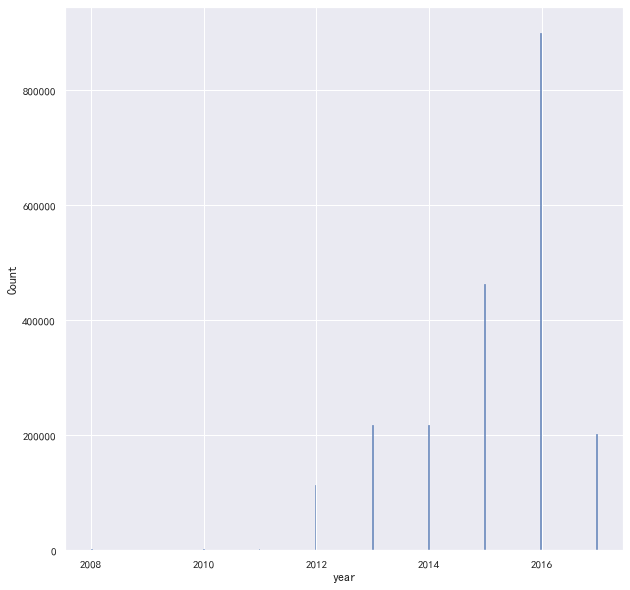

In [41]:
plt.figure(figsize=(10, 10))
sns.histplot(movieshortcomments_data['year'])

### 评论时间——可以利用权值衰减

In [42]:
#108个不同的年月组合
print(len(movieshortcomments_data['year_and_month'].value_counts()))

108


In [43]:
movieshortcomments_data['year_and_month'].value_counts()

2016-12    197286
2017-02    130208
2016-09    128820
2014-07    115048
2016-03    111056
            ...  
2009-06        68
2009-04        64
2009-10        62
2009-11        19
2008-04        15
Name: year_and_month, Length: 108, dtype: int64

### 爬取日期查看

In [44]:
movieshortcomments_data['Crawl_Date'] = pd.to_datetime(movieshortcomments_data['Crawl_Date'])
movieshortcomments_data['Crawl_Date_year'] = movieshortcomments_data['Crawl_Date'].dt.year
movieshortcomments_data['Crawl_Date_year_and_month'] = pd.to_datetime(movieshortcomments_data['Crawl_Date']).map( \
                                lambda x:  str(x.year) + '-' + '0' + str(x.month) \
                                if x.month < 10 else \
                                str(x.year) + '-'  + str(x.month))
movieshortcomments_data.head(1)

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like,year,year_and_month,Crawl_Date_year,Crawl_Date_year_and_month
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404,2015,2015-05,2017,2017-01


In [45]:
movieshortcomments_data['Crawl_Date_year'].value_counts()

2017    2011796
2016     113260
Name: Crawl_Date_year, dtype: int64

<AxesSubplot:xlabel='Crawl_Date_year', ylabel='Count'>

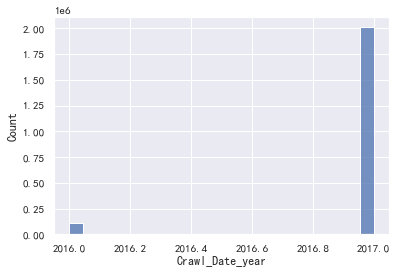

In [46]:
sns.histplot(movieshortcomments_data['Crawl_Date_year'])

In [47]:
movieshortcomments_data['Crawl_Date_year_and_month'].value_counts()

2017-01    1788631
2017-03     223165
2016-12     113260
Name: Crawl_Date_year_and_month, dtype: int64

<AxesSubplot:xlabel='Crawl_Date_year_and_month', ylabel='Count'>

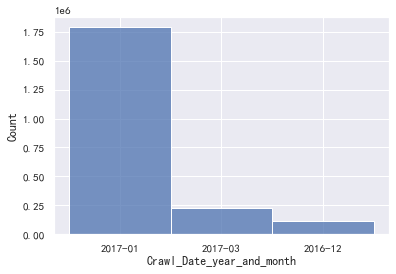

In [48]:
sns.histplot(movieshortcomments_data['Crawl_Date_year_and_month'])

### Number分析

In [49]:
#number应该是用户编号
print(movieshortcomments_data['Number'].value_counts())
print(type(movieshortcomments_data['Number'].value_counts()))

2047      28
1243      28
15581     28
9438      28
19666     28
          ..
140029     1
138112     1
137366     1
137977     1
140713     1
Name: Number, Length: 141048, dtype: int64
<class 'pandas.core.series.Series'>


    每人发表的评论数  有多少人发表了相应次数的评论
0          1            5192
1          2           11354
2          3            8551
3          4            1063
4          5            4260
5          6            6641
6          7            5316
7          8            4255
8          9            3096
9         10            3611
10        11            2673
11        12             799
12        13            1452
13        14            4074
14        15            6581
15        16            4316
16        17            4080
17        18            5260
18        19            5664
19        20            5403
20        21            3153
21        22            2780
22        23            4176
23        24            5096
24        25            4643
25        26            7059
26        27           10845
27        28            9655


<AxesSubplot:xlabel='每人发表的评论数', ylabel='有多少人发表了相应次数的评论'>

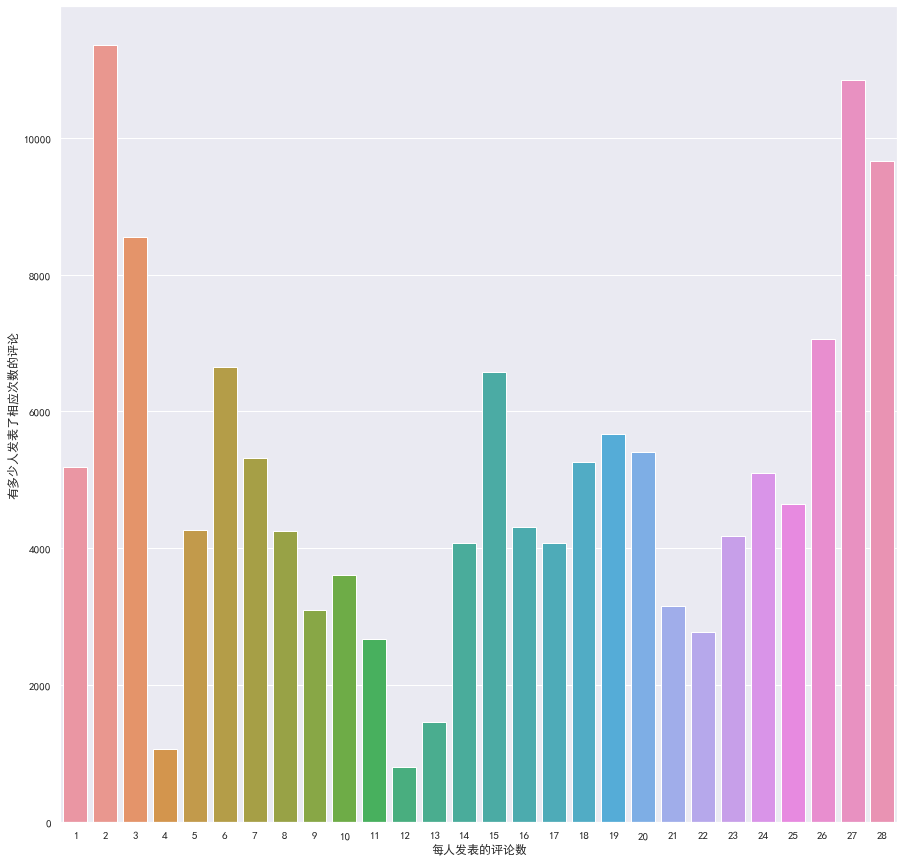

In [50]:
#大部分人只有1条评论#长尾
plt.figure(figsize=(15, 15))
temp = movieshortcomments_data['Number'].value_counts()

# 字典化再处理，其中temp为原Series，temp.index拿出索引列值，temo.values拿到值数组
dict_data = {'number':temp.index, 'rating_count':temp.values  }

# 再生成DataFrame即可
df1 = pd.DataFrame(dict_data)

df1 = df1.groupby(df1['rating_count']).size().reset_index()
df1 = df1.rename(columns = {0: "有多少人发表了相应次数的评论",'rating_count':'每人发表的评论数'})
print(df1.head(30))
sns.barplot(x="每人发表的评论数", y="有多少人发表了相应次数的评论", data =df1)

### Like分析

      喜欢电影的成度  有多少人属于该喜欢成度
0           1        96724
1           2        19785
2           3         8586
3           4         4817
4           5         3116
...       ...          ...
1081      768            1
1082      766            1
1083      763            1
1084     2810            1
1085      521            1

[1086 rows x 2 columns]


<AxesSubplot:xlabel='有多少人属于该喜欢成度', ylabel='Density'>

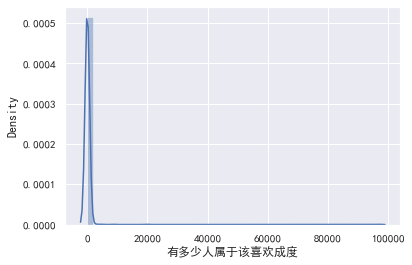

In [51]:
movieshortcomments_data['Like'].value_counts()
templike = movieshortcomments_data['Like'].value_counts()
del templike[0]
# 字典化再处理，其中temp为原Series，temp.index拿出索引列值，temo.values拿到值数组
dict_data = {'like':templike.index, 'like_count':templike.values  }

# 再生成DataFrame即可
df2 = pd.DataFrame(dict_data)

df2 = df2.rename(columns = {'like': "喜欢电影的成度",'like_count':'有多少人属于该喜欢成度'})
print(df2 )
sns.distplot(df2['有多少人属于该喜欢成度'])

<AxesSubplot:xlabel='喜欢电影的成度', ylabel='有多少人属于该喜欢成度'>

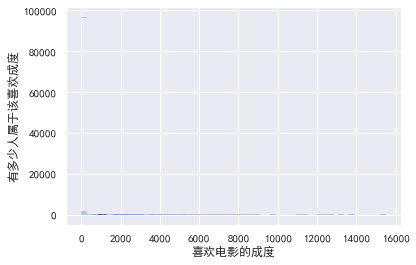

In [52]:
sns.histplot(x="喜欢电影的成度", y="有多少人属于该喜欢成度", data =df2)

In [53]:
user_data.head(1)

,评分,用户名,评论时间,用户ID,电影名,类型,comment_time,year,year_and_month
0,2,身似,2018-01-05 15:05:06,1,心雨花露,爱情,2018-01-05 15:05:06,2018-01-01,2018-01-01


In [54]:
movies_data.head(1)

,类型,主演,地区,导演,特色,评分,电影名
0,剧情,徐峥|王传君|周一围|谭卓|章宇,中国大陆,文牧野,经典,8.9,我不是药神


In [55]:
movieshortcomments_data.head(1)


,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like,year,year_and_month,Crawl_Date_year,Crawl_Date_year_and_month
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404,2015,2015-05,2017,2017-01


In [56]:
movieshortcomments_data.shape

(2125056, 14)

In [57]:
movieshortcomments_data.Username.nunique()

738700

In [58]:
print(len(movieshortcomments_data.Username.unique()))

738701


# 其它联想特征

### 由电影名想到电影上映时间结合user_data中的评论时间距离上映时间的长短。按月/天/小时组合特征 + 权值衰减

### 用户间关系